In [2]:
import json
import gzip
import pandas

In [3]:
import matplotlib
%matplotlib inline

In [4]:
author_mentions_path = 'data/filters/fakePREMIS/author-mentions.json.gz'
greatdismal_path = 'data/users/GreatDismal.json.gz'
salmanrushdie_path = 'data/users/SalmanRushdie.json.gz'
dhnow_path = 'data/users/dhnow.json.gz'

In [12]:
def frequency_by_hour(filepath):
    return frequency_by_x(filepath, "H")

def frequency_by_day(filepath):
    return frequency_by_x(filepath, "D")

def frequency_by_week(filepath):
    return frequency_by_x(filepath, "W")
    
def frequency_by_month(filepath):
    return frequency_by_x(filepath, "M")

def frequency_by_x(filepath, period):
    
    
    with gzip.open(filepath,'rt') as f:
        dates = [get_creation_date(json.loads(line)) for line in f]
            
        
    pandas_dates = pandas.DatetimeIndex(dates)
    series = pandas.Series(1, index=pandas_dates)
    return series.resample(period, how="sum").plot(figsize=(10,4))

def get_creation_date(tweet):
    
    if 'delete' in tweet:
        return
    
    try:
        return tweet["created_at"]
    except ValueError:
        print(tweet)

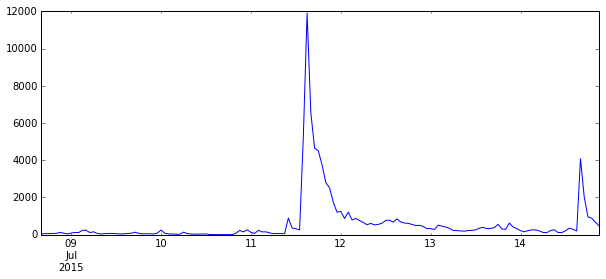

In [13]:
frequency_by_hour(author_mentions_path)

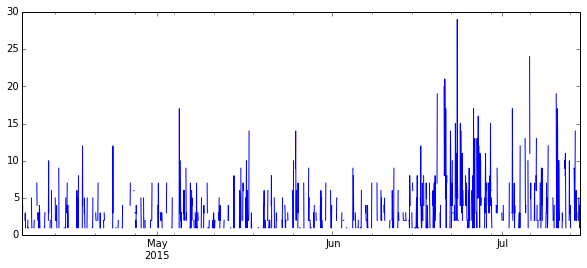

In [16]:
frequency_by_hour(greatdismal_path)

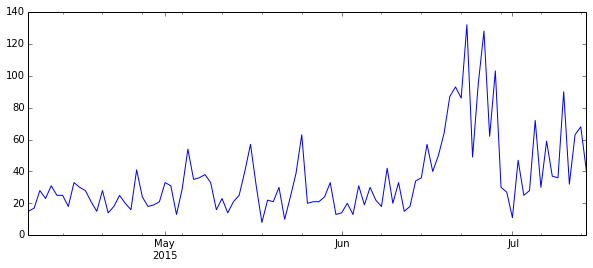

In [17]:
frequency_by_day(greatdismal_path)

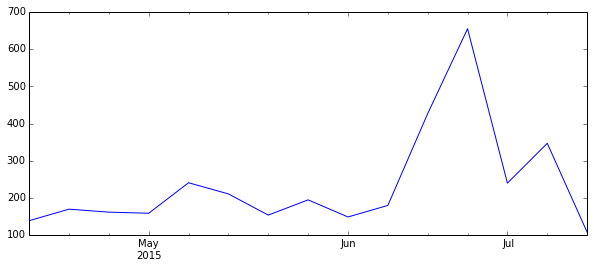

In [18]:
frequency_by_week(greatdismal_path)

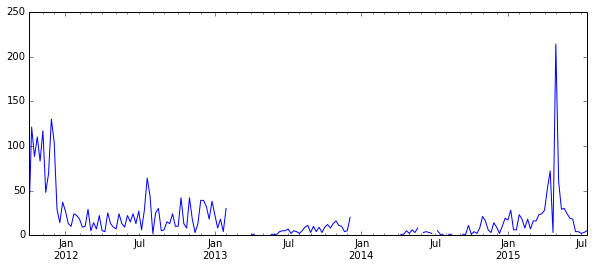

In [19]:
frequency_by_week(salmanrushdie_path)

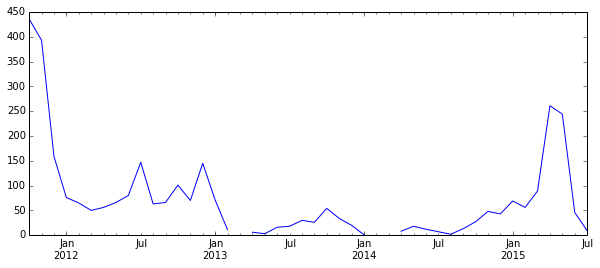

In [20]:
frequency_by_month(salmanrushdie_path)

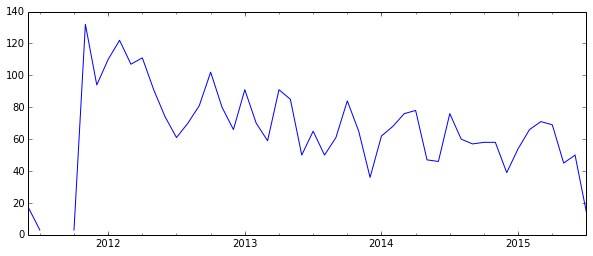

In [21]:
frequency_by_month(dhnow_path)